# Research on apartment sales ads

I worked with data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. The need was to learn how to determine the market value of real estate properties.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the city center, airport, the nearest park or body of water. 

### Step 1. Open the data file and study the general information. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling #conda install -c conda-forge pandas-profiling
from collections import Counter
from collections import defaultdict

missing_values = ["n/a", "na", "--", " "]
real_estate = pd.read_csv(r'data\eda\real_estate_data_us.csv' ,sep='\t',na_values = missing_values)

#getting a general image on the data
pandas_profiling.ProfileReport(real_estate)

Number of variables,22
Number of observations,23699
Total Missing (%),19.5%
Total size in memory,3.7 MiB
Average record size in memory,162.0 B
Numeric,16
Categorical,3
Boolean,2
Date,0
Text (Unique),0
Rejected,1


In [17]:
real_estate.sample(5)

real_estate.info()

real_estate.head().style.bar(subset=['floors_total'],color='blue').bar(subset=['total_area'],color='yellow')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
date_posted          23699 non-null object
days_listed          20518 non-null float64
last_price           23699 non-null float64
bedrooms             23699 non-null int64
kitchen_area         21421 non-null float64
living_area          21796 non-null float64
total_area           23699 non-null float64
balconies            12180 non-null float64
ceiling_height       14504 non-null float64
floors_total         23613 non-null float64
floor                23699 non-null int64
total_images         23699 non-null int64
bike_parking         2775 non-null object
is_studio            23699 non-null bool
is_open_plan         23699 non-null bool
locality_name        23650 non-null object
airport_dist         18157 non-null float64
city_center_dist     18180 non-null float64
park_dist            8079 non-null float64
parks_within_3000    18181 non-null float64
pond_dist            9110 no

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07T00:00:00,nan,260000,3,25,51,108,nan,2.7,16,8,20,nan,False,False,Saint Petersburg,18863,16028,482,1,755,2
1,2018-12-04T00:00:00,81,67000,1,11,18.6,40.4,2,nan,11,1,7,nan,False,False,Shushary village,12817,18603,nan,0,nan,0
2,2015-08-20T00:00:00,558,103920,2,8.3,34.3,56,0,nan,5,4,10,nan,False,False,Saint Petersburg,21741,13933,90,1,574,2
3,2015-07-24T00:00:00,424,1.298e+06,3,nan,nan,159,0,nan,14,9,0,nan,False,False,Saint Petersburg,28098,6800,84,2,234,3
4,2018-06-19T00:00:00,121,200000,2,41,32,100,nan,3.03,14,13,2,nan,False,False,Saint Petersburg,31856,8098,112,2,48,1


### Conclusion

Varibales that can be fixed - 

-  date posted - change the date to a more convinent one, change type to date

- days listed - is needed for later analysis and has too many Nan values. will be change to the median value

-  balconies - change na to 0, change to int

-   bike parking - turn na to false, change to bool

-  park and ponds whith in 3000 change to int and na to 0

- ceiling height is needed for later analysis and has too many Nan values. will be change to the median value

### Step 2. Data preprocessing

In [551]:
#Changing the date to a more convinent look

real_estate['date_posted'] = pd.to_datetime(real_estate['date_posted'],
format='%Y-%m-%dT%H:%M:%S')

#Balconies - chnage type to int and n/a to 0

real_estate['balconies'].fillna(value=0, inplace=True)
real_estate['balconies'] = real_estate['balconies'].astype(int)

#bike parking - turn NAN to false and chgnge type to bool

real_estate['bike_parking'].fillna(value=False, inplace=True)
real_estate['bike_parking'] = real_estate['bike_parking'].astype(bool)

In [552]:
#change parks within 3000 to int and fillna

real_estate['parks_within_3000'].fillna(value=0, inplace=True)
real_estate['parks_within_3000'] = real_estate['parks_within_3000'].astype(int)

#change ponds within 3000 to int and fillna

real_estate['ponds_within_3000'].fillna(value=0, inplace=True)
real_estate['ponds_within_3000'] = real_estate['ponds_within_3000'].astype(int)

#Change Nan values to median in floors total in order to have first/last/other floor
real_estate['floors_total'].fillna(value=real_estate['floors_total'].median(), inplace=True)

#Change ceiling height Nan values to median
real_estate['ceiling_height'].fillna(value=real_estate['ceiling_height'].median(), inplace=True)

#Change days listed height Nan values to median
real_estate['days_listed'].fillna(value=real_estate['days_listed'].median(), inplace=True)

#checking all actions were done well
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
date_posted          23699 non-null datetime64[ns]
days_listed          23699 non-null float64
last_price           23699 non-null float64
bedrooms             23699 non-null int64
kitchen_area         21421 non-null float64
living_area          21796 non-null float64
total_area           23699 non-null float64
balconies            23699 non-null int32
ceiling_height       23699 non-null float64
floors_total         23699 non-null float64
floor                23699 non-null int64
total_images         23699 non-null int64
bike_parking         23699 non-null bool
is_studio            23699 non-null bool
is_open_plan         23699 non-null bool
locality_name        23650 non-null object
airport_dist         18157 non-null float64
city_center_dist     18180 non-null float64
park_dist            8079 non-null float64
parks_within_3000    23699 non-null int32
pond_dist            9110

### conclusion

the data was probably missing because:

###### date_posted - 

changed to a datetime type in order to work correctly

###### balconies -

there were 0 balconies, type changed to int becuase there can not be half a balcony

###### bike parking - 

there was no bike parking in the building, type changed to int becuase there can not be half a parking space

###### parks and ponds within 3000 - 

there were no parks or ponds, type changed to int becuase there can not be half a park/pond

###### floors total - 

human mistake 

###### ceiling height - 

most people don't know their house ceiling height (assumption)

### Step 3. Make calculations and add them to the table

In [553]:
#Price per squere meter
real_estate['price_per_meter'] = real_estate['last_price'] / real_estate['total_area'] 

#get the day of the week the ad was published
real_estate['ad_day_of_week'] = real_estate['date_posted'].dt.weekday

In [554]:
#get the month of the ad published
real_estate['ad_month'] = real_estate['date_posted'].dt.month

#get the year of the ad published
real_estate['ad_year'] = real_estate['date_posted'].dt.year

In [555]:
#get floor first/last/other

#function gets a row and return 0 for first floor, 1 for last floor and 2 for other
try:
    def get_floor (row):
        if row['floor'] == 1:
            return 0
        elif row['floor'] == row['floors_total']:
            return 1
        else:
             return 2
except:
    print('Problem with get floor function, please check the function/data')

#creating a new column with the floor level
real_estate['floor_level'] = real_estate.apply(get_floor,axis=1)

#checking the action was done ok
print(real_estate)

      date_posted  days_listed  last_price  bedrooms  kitchen_area  \
0      2019-03-07         95.0    260000.0         3         25.00   
1      2018-12-04         81.0     67000.0         1         11.00   
2      2015-08-20        558.0    103920.0         2          8.30   
3      2015-07-24        424.0   1298000.0         3           NaN   
4      2018-06-19        121.0    200000.0         2         41.00   
5      2018-09-10         55.0     57800.0         1          9.10   
6      2017-11-02        155.0     74000.0         1         14.40   
7      2019-04-18         95.0    158300.0         2         18.90   
8      2018-05-23        189.0     58000.0         1          8.81   
9      2017-02-26        289.0    108000.0         3          6.50   
10     2017-11-16        137.0    101000.0         1          8.50   
11     2018-08-27          7.0     66000.0         2          6.00   
12     2016-06-30         90.0     77800.0         2          9.00   
13     2017-07-01   

In [556]:
#living space to total ratio
real_estate['living_to_total_ratio'] = real_estate['living_area'] / real_estate['total_area']

#kitchen space to total ratio
real_estate['kitchen_to_total_ratio'] = real_estate['kitchen_area'] / real_estate['total_area']

#change last price to price/100k to we can work with it
real_estate['last_price_in_100k'] = real_estate['last_price']/100000

### Step 4. Conduct exploratory data analysis and follow the instructions below:

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


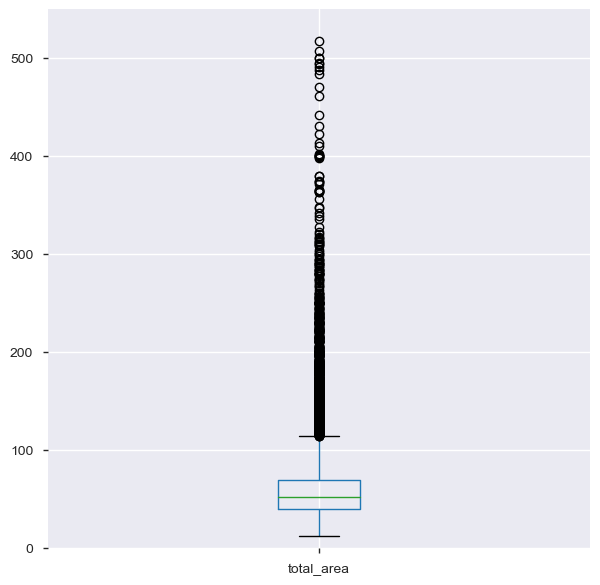

In [557]:
#get a general look at the data points
print(real_estate['total_area'].describe())

#look for outliers 
real_estate['total_area'].plot.box(ylim=(0,550),figsize=(7,7))

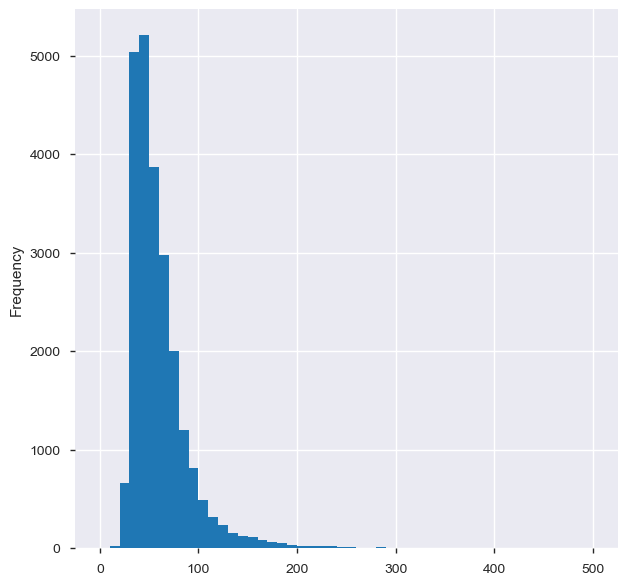

In [558]:
#get a histogram look at the data and the outliers
real_estate['total_area'].plot(kind='hist',bins=50,range=(0,500),figsize=(7,7))

count    23699.000000
mean         1.308310
std          2.177403
min          0.002440
25%          0.680000
50%          0.930000
75%          1.360000
max        152.600000
Name: last_price_in_100k, dtype: float64


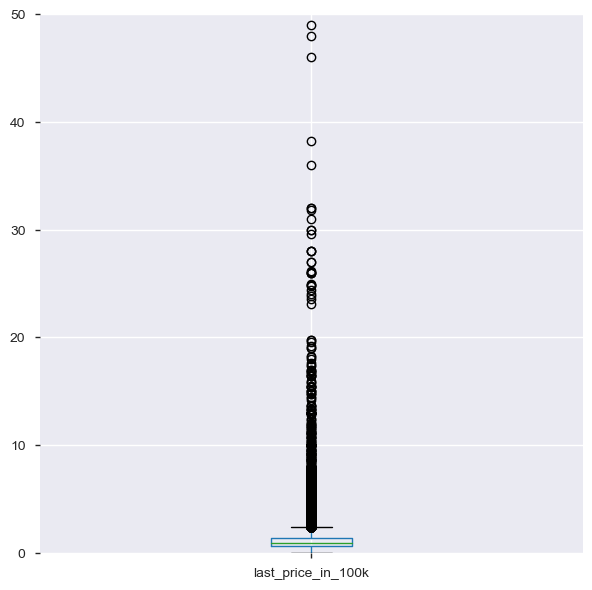

In [559]:
#get a general look at the data points
print(real_estate['last_price_in_100k'].describe())

#look for outliers 
real_estate['last_price_in_100k'].plot.box(ylim=(0,50),figsize=(7,7))

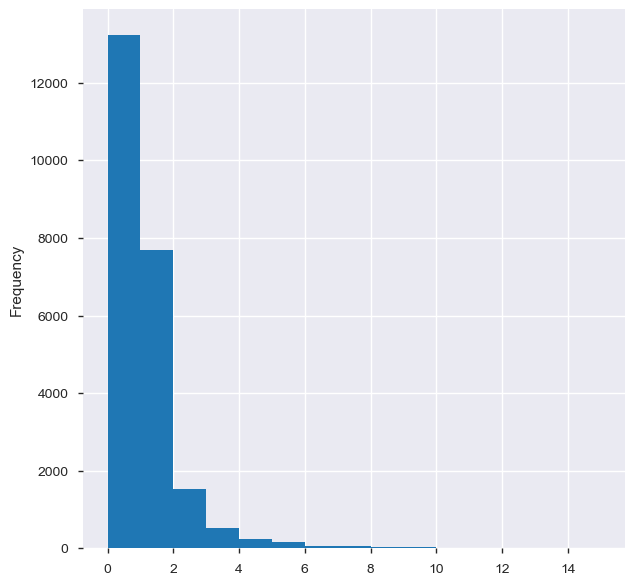

In [560]:
#get a histogram look at the data and the outliers
real_estate['last_price_in_100k'].plot(kind='hist',bins=15,range=(0,15),figsize=(7,7))

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: bedrooms, dtype: float64


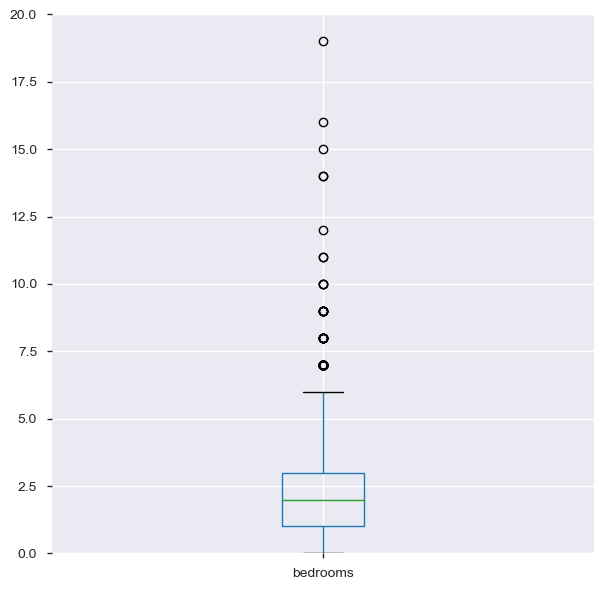

In [561]:
#get a general look at the data points
print(real_estate['bedrooms'].describe())

#looking for outliers 
real_estate['bedrooms'].plot.box(ylim=(0,20),figsize=(7,7))

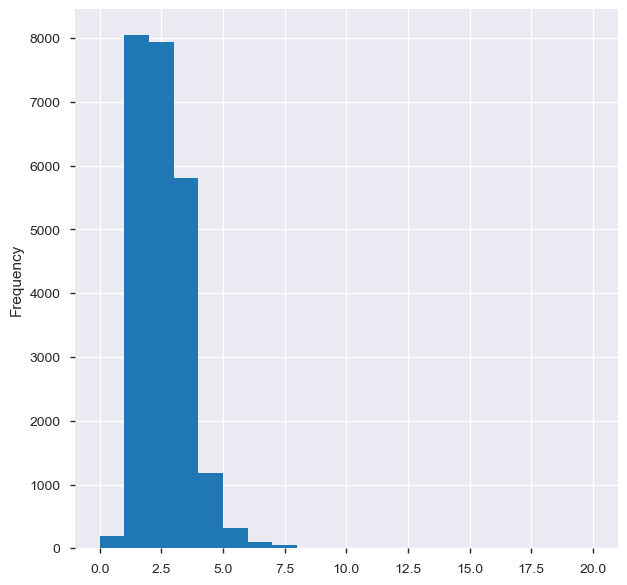

In [562]:
#get a histogram look at the data and the outliers
real_estate['bedrooms'].plot(kind='hist',bins=20,range=(0,20),figsize=(7,7))

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


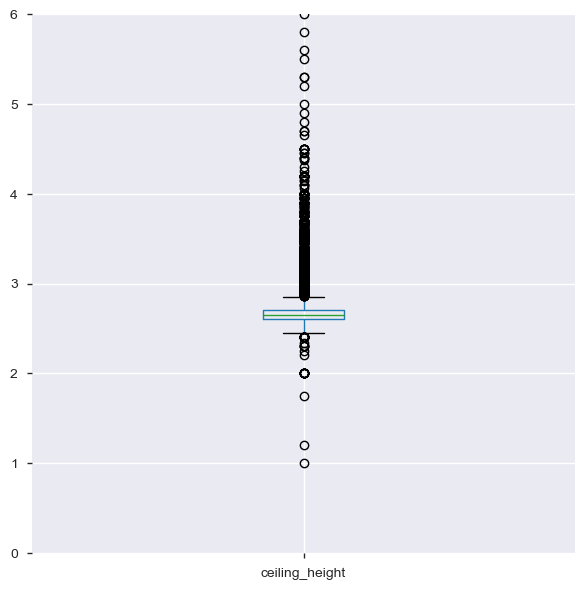

In [563]:
#get a general look at the data points
print(real_estate['ceiling_height'].describe())

#look for outliers 
real_estate['ceiling_height'].plot.box(ylim=(0,6),figsize=(7,7))

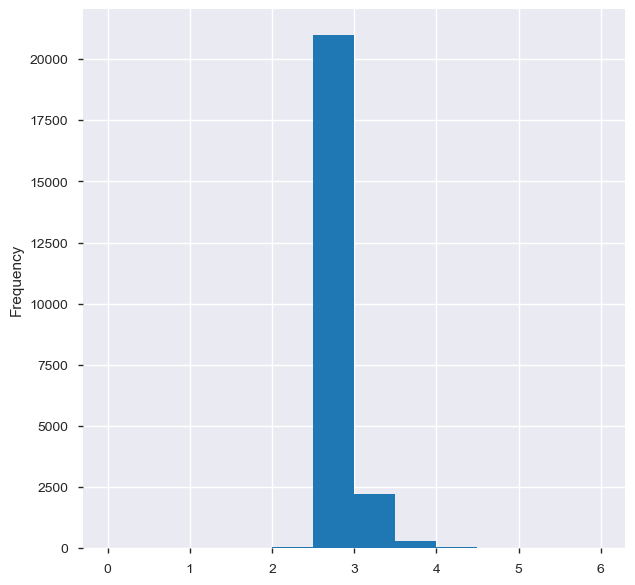

In [564]:
#get a histogram look at the data and the outliers
real_estate['ceiling_height'].plot(kind='hist',bins=12,range=(0,6),figsize=(7,7))

### Conclusions

Most apartment have:

1. Between 30 to 60 sqm
2. Cost between 68,000 to 200,000
3. Have between 1 to 3 bedrooms ()
4. Have a ceiling height of between 2.5 to 3 meters (was between 2 to 3.5 meters changing Nan values to mean)

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_listed, dtype: float64


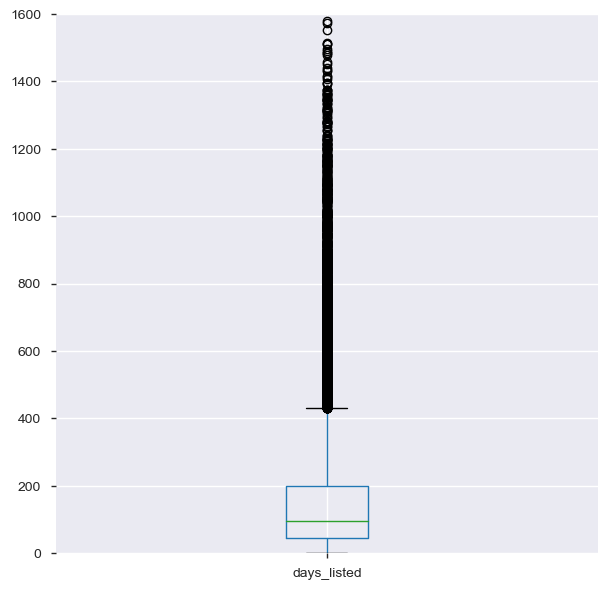

In [565]:
#understand how much time does it takes to sell an apartment

#get a general look at the data points
print(real_estate.days_listed.describe())

#look for outliers 
real_estate['days_listed'].plot.box(ylim=(0,1600),figsize=(7,7))

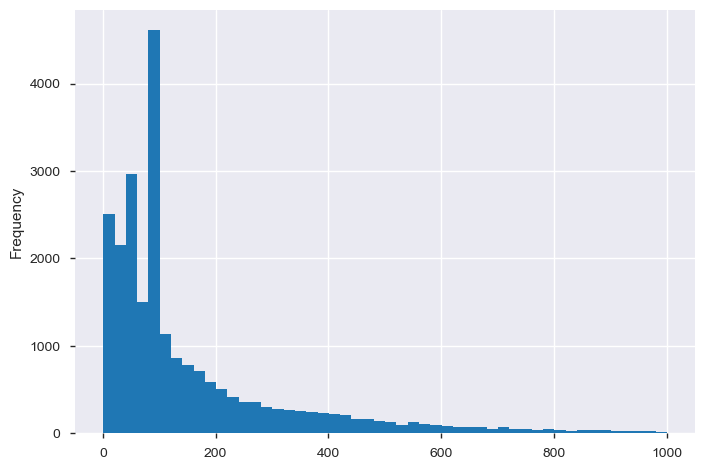

In [566]:
#get a histogram look at the data and the outliers
real_estate.days_listed.plot(kind='hist',bins=50,range=(1,1000))

In [567]:
#get the average time it takes to sale an apartment (mean Q3-Q1 values)
real_estate.query('45<=days_listed<=232')['days_listed'].mean()

105.37734172528693

### coclusion
The median is 95 days

The mean is 180 days
(the mean is sensitive to big values to its higer)

The average time to make a sale is 105 days (The mean of the data between Q1 and Q3. was 108 before replacing Nan in median)

A sale can be considerd quick if it has happened in 45 days or less or slow if it has happened in 230 days or more

#### Remove rare and outlying values and describe the patterns you've discovered 

In [568]:
#Checking how much data i am going to lose in order not to drop more than 5%-10%
print(len(real_estate.query('days_listed <= 1000')))
print(len(real_estate.query('last_price_in_100k <= 8')))
print(len(real_estate.query('total_area <= 210')))
print(len(real_estate.query('bedrooms <= 12')))
print(len(real_estate.query('ceiling_height <= 4')))

23624

In [569]:
#Removing outliers

#creating a copy of the real_estate data
real_estate_clean = real_estate.copy()
real_estate_looklike = real_estate.copy()

#dropping the outliers from the data
real_estate_clean = real_estate_clean.query('days_listed <= 1000')
real_estate_clean = real_estate_clean.query('last_price_in_100k<=8')
real_estate_clean = real_estate_clean.query('total_area <= 210')
real_estate_clean= real_estate_clean.query('bedrooms <= 5')
real_estate_clean = real_estate_clean.query('ceiling_height <= 4')

#Leaving only the coulmns that are needed for the analysis
real_estate_clean.drop(real_estate_clean.columns.difference(['date_posted', 'days_listed','bedrooms','total_area','ceiling_height','locality_name','city_center_dist','price_per_meter', 'ad_day_of_week', 'ad_month', 'ad_year','floor_level','last_price_in_100k']), 1, inplace=True)
real_estate_looklike.drop(real_estate_looklike.columns.difference(['date_posted', 'days_listed','bedrooms','total_area','ceiling_height','locality_name','city_center_dist','price_per_meter', 'ad_day_of_week', 'ad_month', 'ad_year','floor_level','last_price_in_100k']), 1, inplace=True)

#Calculating total_area_avg_for_location for use in 10 most localities ads
real_estate_clean['total_area_avg_for_location'] = real_estate_clean.groupby('locality_name')['total_area'].transform('mean')

#checking data lost amount
print(real_estate_clean.shape[0])
print()
print(real_estate.shape[0])

#getting general corralation look
real_estate_clean.corr()

22985

23699


,days_listed,bedrooms,total_area,ceiling_height,city_center_dist,price_per_meter,ad_day_of_week,ad_month,ad_year,floor_level,last_price_in_100k,total_area_avg_for_location
days_listed,1.000000,0.083887,0.107899,0.066837,-0.040514,-0.001670,-0.012995,-0.014056,-0.539581,-0.043589,0.070703,0.010899
bedrooms,0.083887,1.000000,0.780711,0.185345,-0.147296,-0.050502,-0.003087,-0.002305,-0.045242,-0.060685,0.466790,0.157801
total_area,0.107899,0.780711,1.000000,0.370044,-0.218942,0.185614,-0.011356,0.007617,-0.072131,0.027883,0.772072,0.215901
ceiling_height,0.066837,0.185345,0.370044,1.000000,-0.284462,0.292623,-0.021223,-0.006107,-0.040824,0.008424,0.409627,0.149081
city_center_dist,-0.040514,-0.147296,-0.218942,-0.284462,1.000000,-0.377248,0.007673,-0.009527,0.022981,-0.064265,-0.334358,-0.603309
price_per_meter,-0.001670,-0.050502,0.185614,0.292623,-0.377248,1.000000,-0.010988,-0.006763,0.049067,0.195009,0.710333,0.465271
ad_day_of_week,-0.012995,-0.003087,-0.011356,-0.021223,0.007673,-0.010988,1.000000,0.010613,-0.008427,0.000289,-0.010494,-0.009564
ad_month,-0.014056,-0.002305,0.007617,-0.006107,-0.009527,-0.006763,0.010613,1.000000,-0.276628,0.012762,0.001194,0.000288
ad_year,-0.539581,-0.045242,-0.072131,-0.040824,0.022981,0.049067,-0.008427,-0.276628,1.000000,0.018142,-0.024676,-0.028438
floor_level,-0.043589,-0.060685,0.027883,0.008424,-0.064265,0.195009,0.000289,0.012762,0.018142,1.000000,0.118223,0.084830


In [570]:
real_estate_looklike.corr()

,days_listed,bedrooms,total_area,ceiling_height,city_center_dist,price_per_meter,ad_day_of_week,ad_month,ad_year,floor_level,last_price_in_100k
days_listed,1.000000,0.098999,0.116840,0.013236,-0.051563,0.032066,-0.019205,-0.008544,-0.576744,-0.035571,0.065469
bedrooms,0.098999,1.000000,0.758344,0.047991,-0.184864,0.055420,-0.004134,-0.004469,-0.055418,-0.056441,0.363343
total_area,0.116840,0.758344,1.000000,0.080613,-0.231446,0.301960,-0.004695,0.004920,-0.079912,0.012831,0.653675
ceiling_height,0.013236,0.047991,0.080613,1.000000,-0.075508,0.099837,-0.009925,-0.002703,-0.000284,0.002625,0.064425
city_center_dist,-0.051563,-0.184864,-0.231446,-0.075508,1.000000,-0.317951,0.008883,-0.008978,0.032333,-0.063650,-0.206747
price_per_meter,0.032066,0.055420,0.301960,0.099837,-0.317951,1.000000,-0.007272,-0.001995,0.008516,0.146886,0.736499
ad_day_of_week,-0.019205,-0.004134,-0.004695,-0.009925,0.008883,-0.007272,1.000000,0.011496,-0.004799,-0.001242,0.001550
ad_month,-0.008544,-0.004469,0.004920,-0.002703,-0.008978,-0.001995,0.011496,1.000000,-0.269642,0.012027,0.002779
ad_year,-0.576744,-0.055418,-0.079912,-0.000284,0.032333,0.008516,-0.004799,-0.269642,1.000000,0.015092,-0.043089
floor_level,-0.035571,-0.056441,0.012831,0.002625,-0.063650,0.146886,-0.001242,0.012027,0.015092,1.000000,0.041339


### Conclusion

Most corralated varibels with the price apartments are (on the clean data set): 

1. total area - 0.772
2. price per meter - 0.710
3. bedrooms - 0.466
4. ceiling height - 0.409

Corralation that went up after removing outliers (having values of -0.3/0.3 or higher) - 

1. bedrooms
2. total area
3. ceiling height

Corralation that went down after removing outliers (having values of -0.3/0.3 or higher) - 

1. price per meter
2. city center distance

which means that the parameters that went up maybe affect the price more than we thought.

the most affecting values on price are total area and number of bedrooms (i took out price per meter as it is a price ingridient)

0.7720724013337136

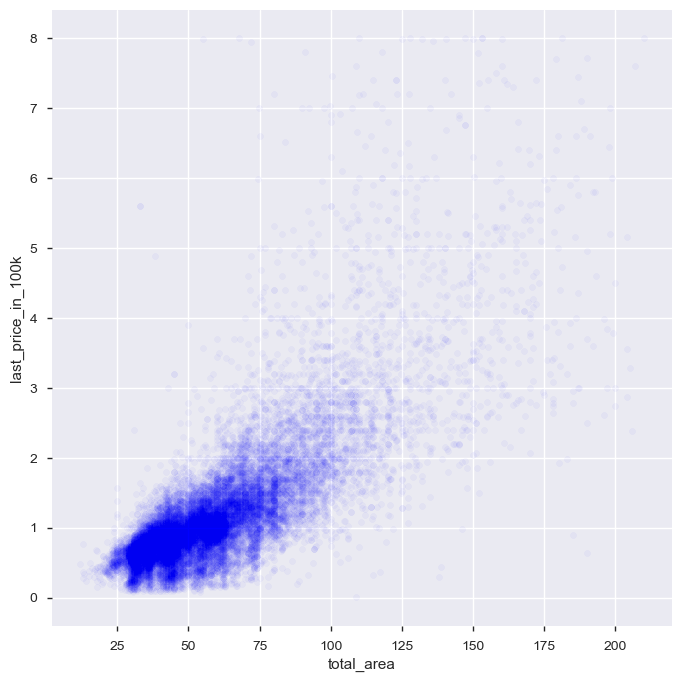

In [571]:
#which factor has the most influence on price - total square area, number of rooms, floor (top or bottom) or the proximity to the city center area

#check if day of the week, month, and year affected the price

#check total area corralation to price
real_estate_clean.plot(x='total_area',y='last_price_in_100k',kind='scatter',alpha=0.03,color='b',figsize=(8,8))
real_estate_clean['total_area'].corr(real_estate_clean['last_price_in_100k'])

0.46679029174897313

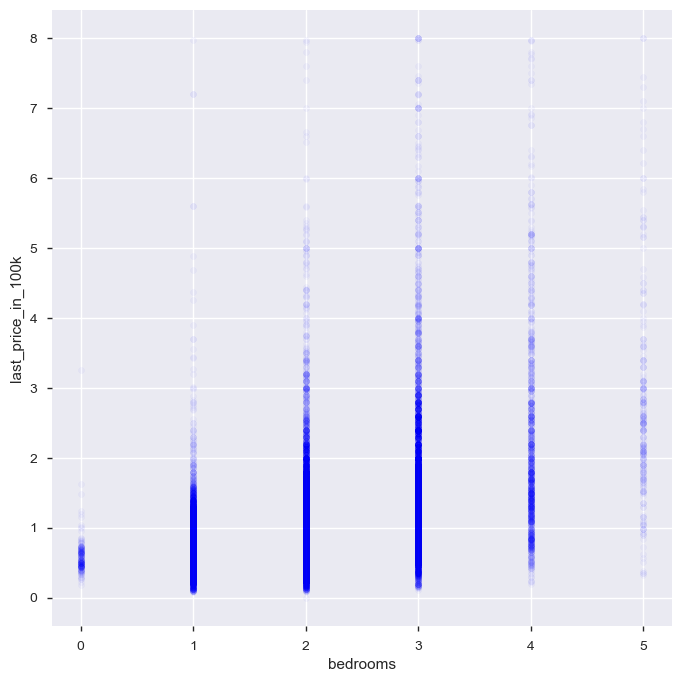

In [572]:
#check bedrooms corralation to price

real_estate_clean.plot(x='bedrooms',y='last_price_in_100k',kind='scatter',alpha=0.03,color='b',figsize=(8,8))
real_estate_clean['bedrooms'].corr(real_estate_clean['last_price_in_100k'])

0.1182225606604162

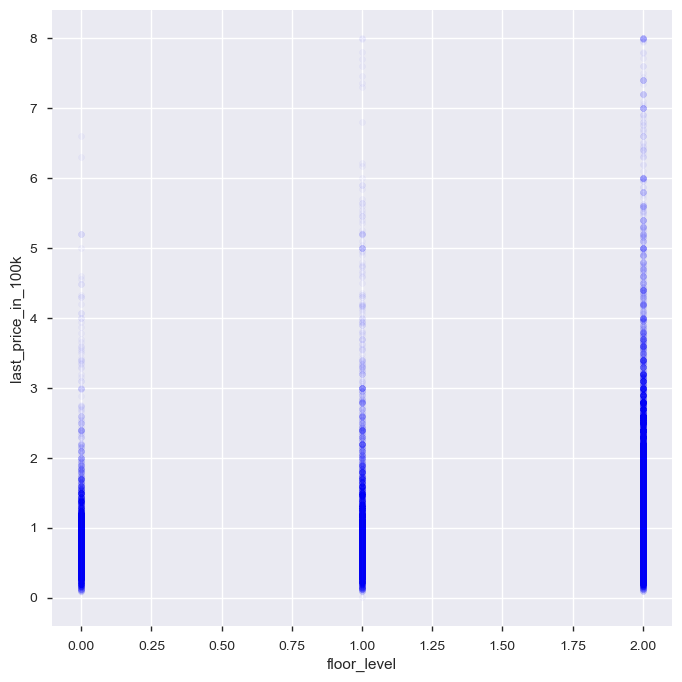

In [573]:
#check floor_level corralation to price
real_estate_clean.plot(x='floor_level',y='last_price_in_100k',kind='scatter',alpha=0.03,color='b',figsize=(8,8))
real_estate_clean['floor_level'].corr(real_estate_clean['last_price_in_100k'])

-0.33435839103230214

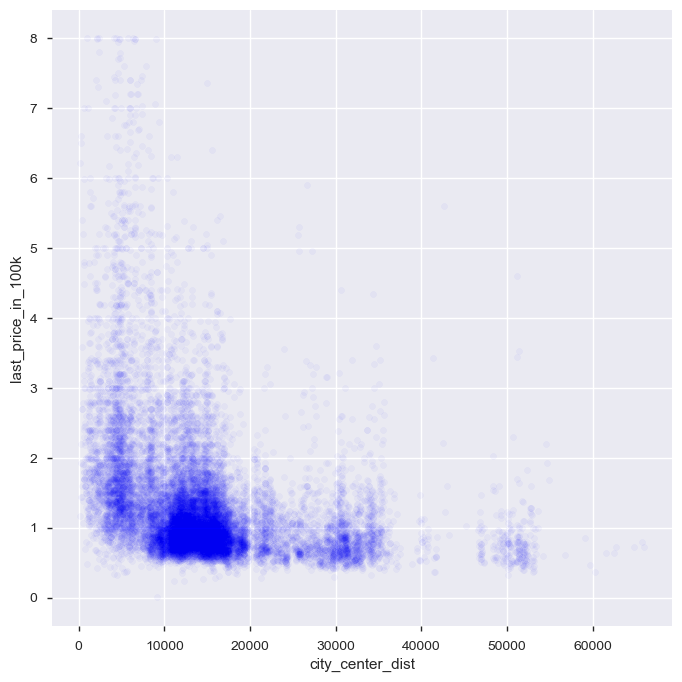

In [574]:
#check city center distance corralation to price
real_estate_clean.plot(x='city_center_dist',y='last_price_in_100k',kind='scatter',alpha=0.03,color='b',figsize=(8,8))
real_estate_clean['city_center_dist'].corr(real_estate_clean['last_price_in_100k'])

-0.010494174351674969

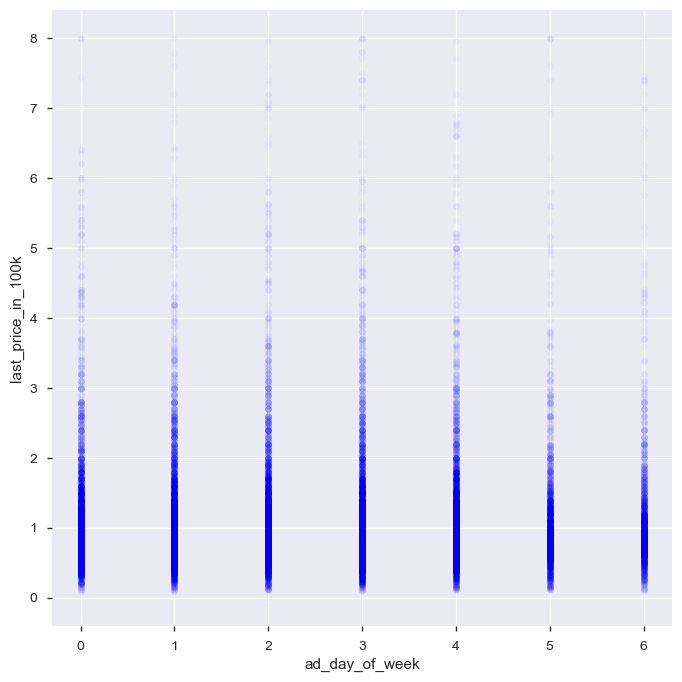

In [575]:
#check ad day of week corralation to price
real_estate_clean.plot(x='ad_day_of_week',y='last_price_in_100k',kind='scatter',alpha=0.03,color='b',figsize=(8,8))
real_estate_clean['ad_day_of_week'].corr(real_estate_clean['last_price_in_100k'])

0.0011944354649595207

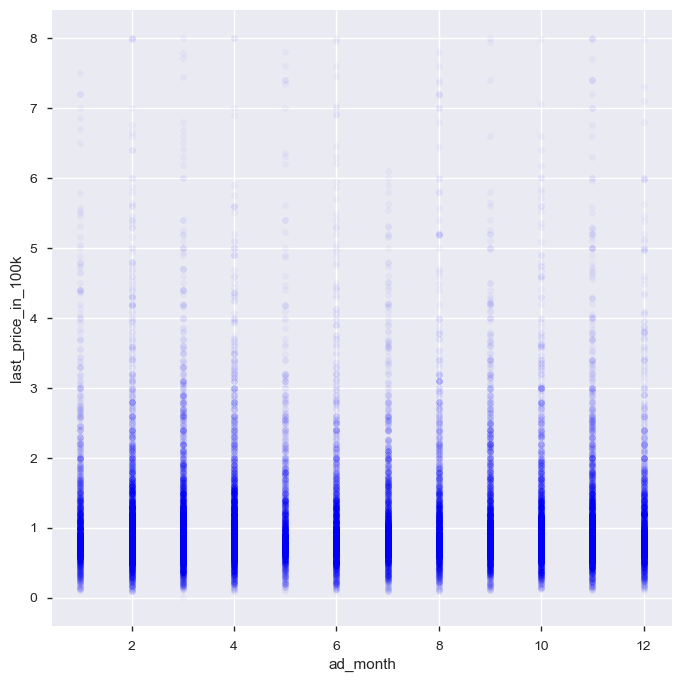

In [576]:
#check ad month corralation to price
real_estate_clean.plot(x='ad_month',y='last_price_in_100k',kind='scatter',alpha=0.03,color='b',figsize=(8,8))
real_estate_clean['ad_month'].corr(real_estate_clean['last_price_in_100k'])

-0.02467602132827885

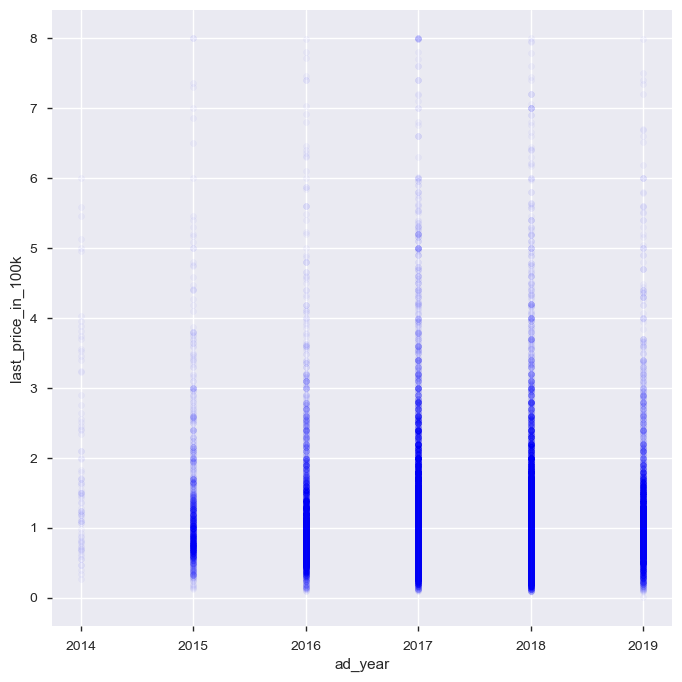

In [577]:
#check ad year corralation to price
real_estate_clean.plot(x='ad_year',y='last_price_in_100k',kind='scatter',alpha=0.03,color='b',figsize=(8,8))
real_estate_clean['ad_year'].corr(real_estate_clean['last_price_in_100k'])

### Conclusion

The highest corralation varible - 

1. total area

Had some corralation - 

1. number of bedrooms
2. proximity to city center

In [578]:
#analysis of 10 localities with the greatest number of ads

#turn to lower case
real_estate_clean['locality_name'] = real_estate_clean['locality_name'].str.lower()

#get the names of the 10 most common cities
most_common_cities = real_estate_clean['locality_name'].value_counts()[0:10].keys()

#get the housing price - Considering the fact that housing prices are being determined by apartment size and price
#i took the average size of a house on sale and price per meter

real_estate_clean['house_price'] = real_estate_clean['total_area']*real_estate_clean['price_per_meter']

#get top 10 cities price per meter and total area average
top_ten_real_estate = real_estate_clean.query('locality_name in @most_common_cities')
top_ten_real_estate_pt = top_ten_real_estate.pivot_table(index='locality_name',values=['price_per_meter','total_area'])

#get the housing price per location
top_ten_real_estate_pt['housing_price'] = top_ten_real_estate_pt['total_area']*top_ten_real_estate_pt['price_per_meter']

#sort the housing prices from top to bottom
top_ten_real_estate_pt.sort_values('housing_price',ascending=False)

,price_per_meter,total_area,housing_price
locality_name,,,
saint petersburg,2231.590768,60.526084,135069.450417
pushkin,2063.815547,58.460504,120651.697456
pargolovo village,1805.194865,51.099600,92244.735525
kudrovo village,1848.430500,46.611122,86157.420375
shushary village,1572.316151,53.928807,84793.134789
kolpino,1505.594165,52.302448,78746.260169
vsevolozhsk,1373.014054,56.126031,77061.828705
murino village,1715.285136,43.798634,75127.145654
gatchina,1375.153561,50.929020,70035.222672


### Conclusion

Housing prices locations from high to low:

1. saint petersburg	
2. pushkin
3. pargolovo village
4. kudrovo village
5. shushary village
6. kolpino
7. vsevolozhsk
8. murino village
9. gatchina
10. vyborg

,city_center_dist_km,last_price_in_100k
0,0.0,3.042237
1,1.0,2.390690
2,2.0,2.251716
3,3.0,1.917394
4,4.0,2.091321
5,5.0,2.201027
6,6.0,2.026101
7,7.0,2.100874
8,8.0,1.779405
9,9.0,1.381785


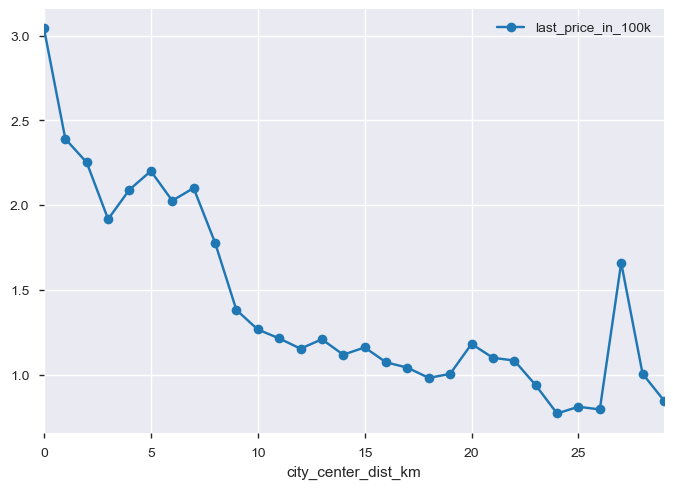

In [579]:
#turn city distance to km
real_estate_clean['city_center_dist_km'] = (real_estate_clean['city_center_dist']/1000).round()

#filter all cities excpet saint petersburg
saint_pet = real_estate_clean.query('locality_name == "saint petersburg"')

#build a pivot table of apartment price by kilometer distance
saint_pet_pt = saint_pet.pivot_table(index='city_center_dist_km', values='last_price_in_100k')

saint_pet_pt = saint_pet_pt.reset_index()

saint_pet_pt.plot(x='city_center_dist_km',y='last_price_in_100k',style='o-')

saint_pet_pt

### Conclusion - 

The city center border is between 8 - 9 km from the city center

,bedrooms,total_area,last_price_in_100k,ceiling_height
bedrooms,1.000000,0.774581,0.419484,0.225350
total_area,0.774581,1.000000,0.723271,0.256645
last_price_in_100k,0.419484,0.723271,1.000000,0.184432
ceiling_height,0.225350,0.256645,0.184432,1.000000


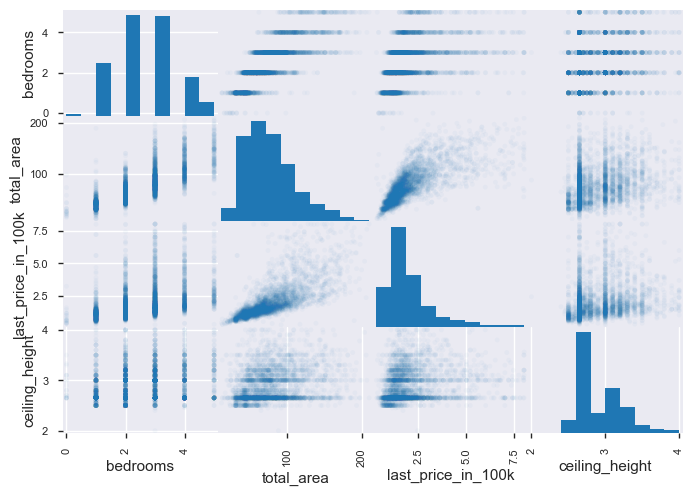

In [580]:
#get only apartments inside the city
city_center_real_estate = saint_pet.query('city_center_dist_km < 9')

#check corralation between the parameters
parameters_check = city_center_real_estate[['bedrooms','total_area','last_price_in_100k','ceiling_height']]
pd.plotting.scatter_matrix(parameters_check,alpha=0.03)
parameters_check.corr()

0.41948365010037636

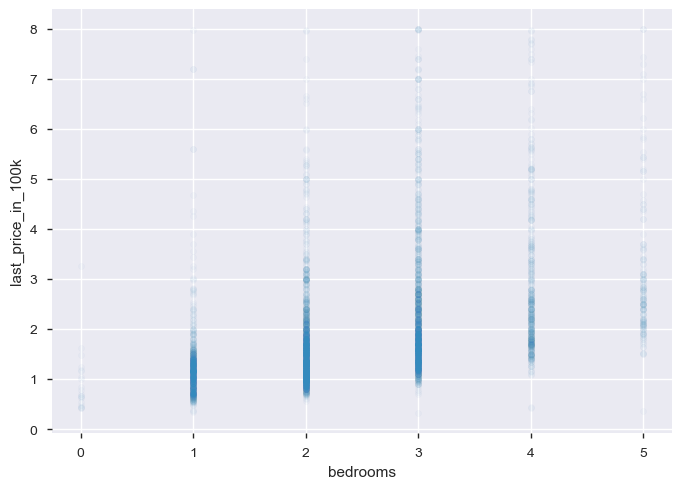

In [581]:
#check bedrooms and price corralation inside the city
city_center_real_estate.plot(x='bedrooms',y='last_price_in_100k',kind='scatter',alpha=0.03)
city_center_real_estate['last_price_in_100k'].corr(city_center_real_estate['bedrooms'])

0.1539828447846963

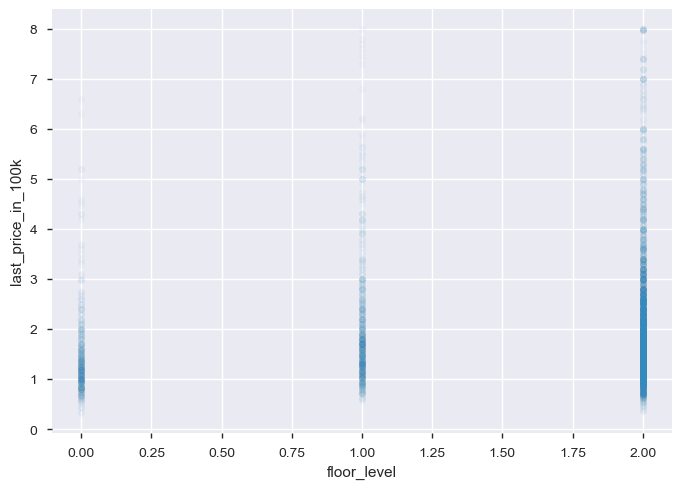

In [582]:
city_center_real_estate.plot(x='floor_level',y='last_price_in_100k',kind='scatter',alpha=0.03)
city_center_real_estate['last_price_in_100k'].corr(city_center_real_estate['floor_level'])

-0.0895116135186379

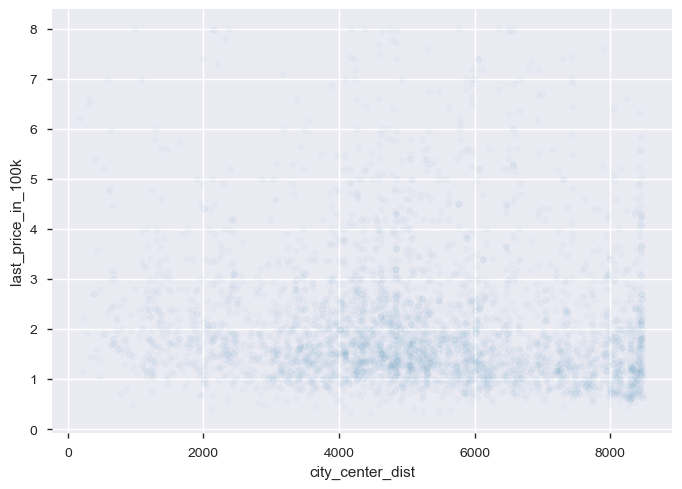

In [583]:
city_center_real_estate.plot(x='city_center_dist',y='last_price_in_100k',kind='scatter',alpha=0.03)
city_center_real_estate['last_price_in_100k'].corr(city_center_real_estate['city_center_dist'])

6.515129265584453e-05

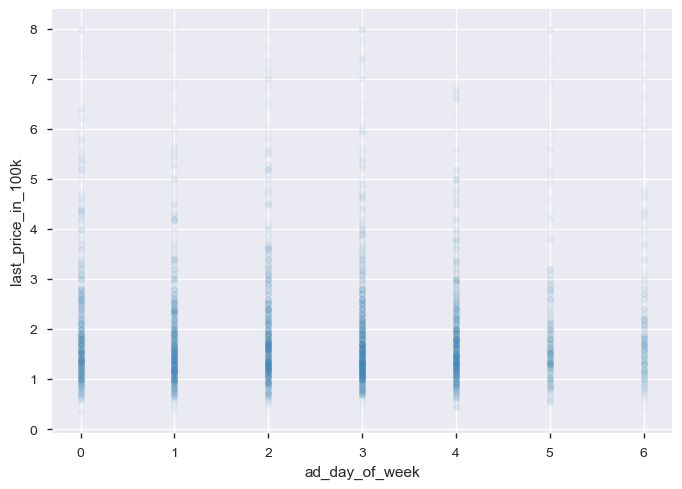

In [584]:
city_center_real_estate.plot(x='ad_day_of_week',y='last_price_in_100k',kind='scatter',alpha=0.03)
city_center_real_estate['last_price_in_100k'].corr(city_center_real_estate['ad_day_of_week'])

-0.02913726231872669

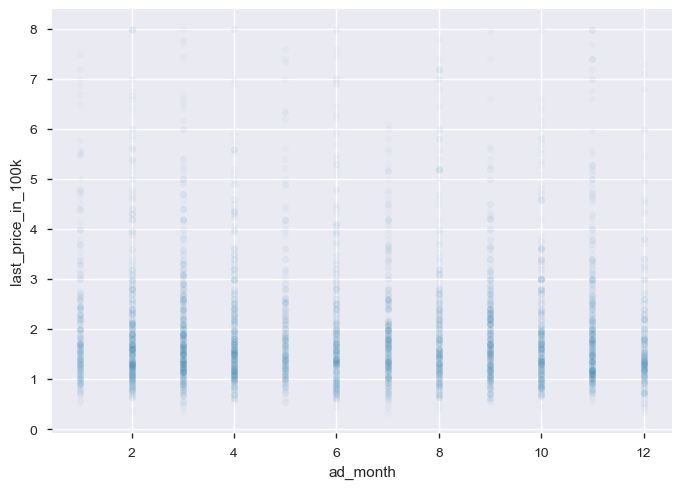

In [585]:
city_center_real_estate.plot(x='ad_month',y='last_price_in_100k',kind='scatter',alpha=0.03)
city_center_real_estate['last_price_in_100k'].corr(city_center_real_estate['ad_month'])

-0.006716100013765151

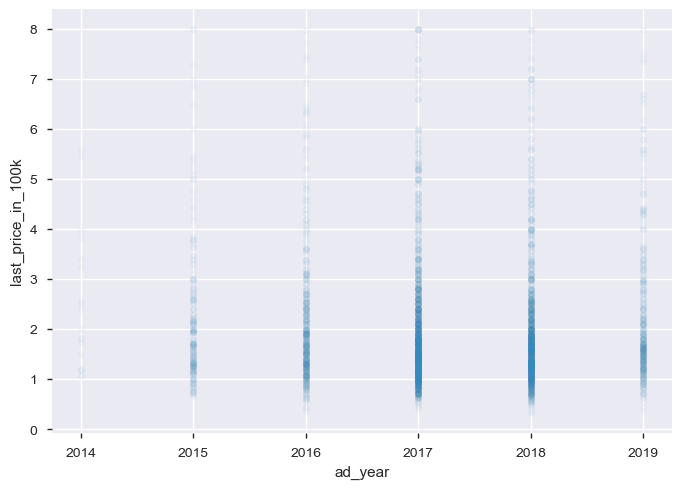

In [586]:
city_center_real_estate.plot(x='ad_year',y='last_price_in_100k',kind='scatter',alpha=0.03)
city_center_real_estate['last_price_in_100k'].corr(city_center_real_estate['ad_year'])

## Conclusion 

### Corralations to price:

**City center**

total area = 0.722

ceiling height = 0.184

bedrooms = 0.418

floor level, city distance, ad date had very little corralation 

**General**

total area = 0.772

ceiling height = 0.409

bedroom = 0.466

city distance - had bigger corrlation (-0.334)

floor level, ad date had very little corrlation

**outside the city there is a higher corralation between price and ceiling height**
**there was also a small increase in the corralation of number of bedrooms to price and total area to price**


### Parameters that effected house pricing:

The parameters that had the greatest affect on housing prices inside the city are:

1. Total area
2. Number of bedrooms

i beileve  the change in the ceiling height might be becuase in the city there are more buildings and therefore lower ceilings
unlike the suberbs where the hight of the house might be less of a problem due to the amount fo available space. 

### Step 5. Overall conclusion

**Looking at the entire data set -** 

Most apartment have:

Between 30 to 60 sqm

Cost between 68,000 to 200,000

Have between 1 to 3 bedrooms ()

Have a ceiling height of between 2.5 to 3 meters (was between 2 to 3.5 meters changing Nan values to mean)


Most corralated varibels with the price apartments are: 

1. total area - 0.772
2. price per meter - 0.71
3. bedrooms - 0.466
4. ceiling height - 0.409

Housing prices locations from high to low:

1. saint petersburg	
2. pushkin
3. pargolovo village
4. kudrovo village
5. shushary village
6. kolpino
7. vsevolozhsk
8. murino village
9. gatchina
10. vyborg


The city center border is between 8 - 9 km from the city center


outside the city there is a higher corralation between price and ceiling height
there was also a small increase in the corralation of number of bedrooms to price and total area to price

